# Data Normalization: Comparing Police Violence in North America

## Learing Outcomes:
1) Understand how data normalization impacts the way we perceive patterns in a dataset

2) Understand different data clasification methods and how they impact the way we percieve patterns in a dataset

3) Revisit measurement scales, how are they related to classification methods

4) Using data nomralization and classification to create indices

5) Chloropleth mapping!!

# Content Warning:
* This lecture/workshop deals with a dificult and painful subject that may be triggering to some people.  The datasets we're using today describe incedents of police killings in Canada and the United States


## Pre-Lecture Poll questions:

### 1) In which country has a higher frequency of police violence?
    A) Canada
    B) The United States
    C) They're about equal
    
### 2) Which country has a greater racial disparity in incidetns of police violence?
    A) Canada
    B) The United States
    C) They're about equal
    
    
### 3) In which country are victims of police violence more likely to be unarmed?
    A) Canada
    B) The United States
    C) They're about equal

In [1]:
## This module aggregates the data into a format that's easy for us to work with
import ParseData
import numpy as np
## We'll use maptloltib to make some plots
import matplotlib.pyplot as plt
%matplotlib notebook


## Calling "GetData" does all of our prepprocessing
Data = ParseData.GetData()

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (21,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


# Candaian Police Violence Data


    This data was collected by the CBC.  It is not an official count.  The numbers are likely underreported and there are a number of missing variables.


## 1) The total number of police killings annually
    The data spans between January 2000 - June 2020
### There were 556 killings in total 

Total Police Killings in Canada: Jan 2000 - June 2020: 556


<IPython.core.display.Javascript object>


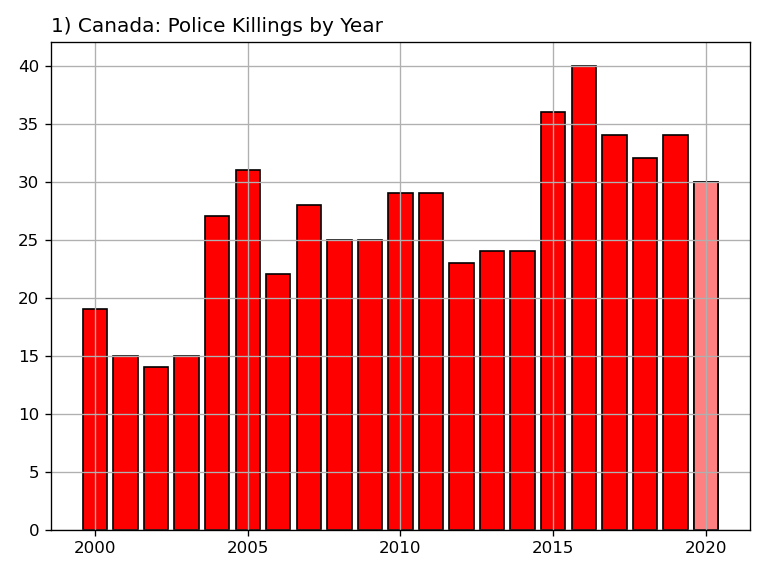

In [2]:
CA_Total=Data.CA_PoliceKillings['PROV'].count()
print('Total Police Killings in Canada: Jan 2000 - June 2020: '+str(CA_Total.sum()))

fig,ax=plt.subplots(1,1)
ax.set_title('1) Canada: Police Killings by Year',loc='left')
ByYear=Data.CA_PoliceKillings.resample('YS').count()['PROV']
ax.bar(ByYear.index.year,ByYear.values,color=[1,0,0],edgecolor='k')
ax.bar([2020],[ByYear.values[-1]],color=[1,.5,.5],edgecolor='k')
plt.grid()
plt.tight_layout()


## 2) The racial breakdown of police killings for each country.
    Demographic groups are not evenly represented in the populations
    This skews the breakdown and makes it look like white people are more likely to experience police violicne
        However: Canada is about 73.4% White while its only 4.7% Indigenous and 3.4% Black
        So the number are obviously skewed.  But by how much?  We'll discuss data normalization later, which is a technique we can use to adjust for different populations for different demographic groups


0.034096332333932486


<IPython.core.display.Javascript object>


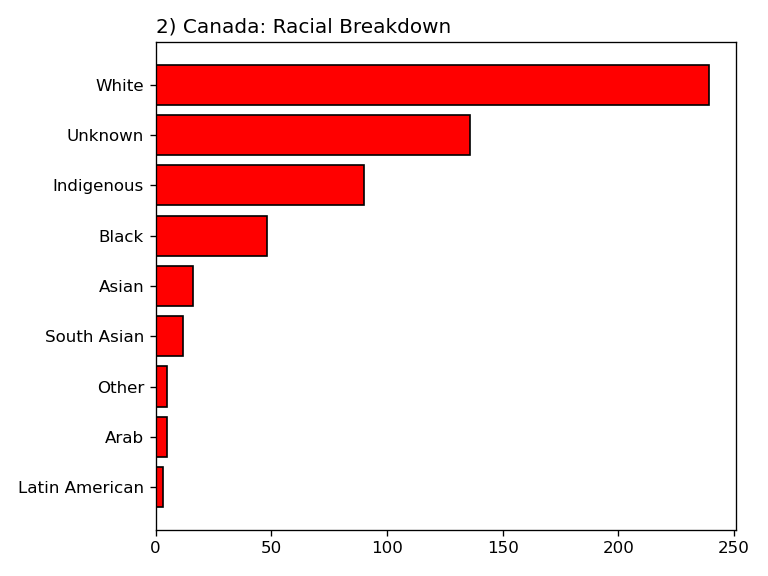

In [3]:
print(Data.CA.sum()['Black']/Data.CA.sum()['Total'])


fig,ax=plt.subplots(1,1)
ax.set_title('2) Canada: Racial Breakdown',loc='left')
ByRace=Data.CA_PoliceKillings.groupby('RACE').count()['PROV'].sort_values()
ax.barh(ByRace.index,ByRace.values,color=[1,0,0],edgecolor='k')
plt.tight_layout()


## 3) Age distribution of victims
    This histogram shows the age distribution of victims in 5 year increments.  We'll discuss more about histograms later on
    *Of the 556 killings, we know the age of 540 of them.  The youngest was 15 and the oldest was 77

count    540.000000
mean      36.527778
std       11.719082
min       15.000000
25%       27.000000
50%       35.000000
75%       44.000000
max       77.000000
Name: AGE, dtype: float64


<IPython.core.display.Javascript object>


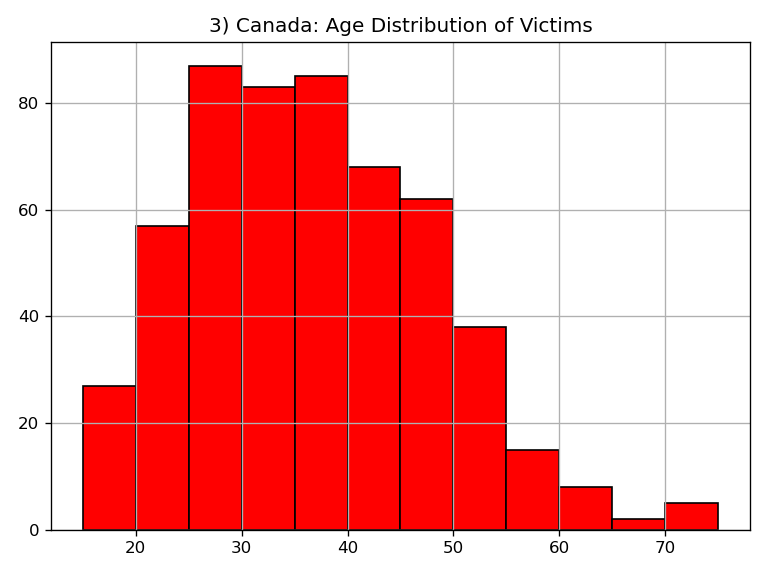

In [4]:
print(Data.CA_PoliceKillings['AGE'].describe())

fig,ax=plt.subplots(1,1)
Data.CA_PoliceKillings['AGE'].hist(bins = np.arange(15,80,5),color=[1,0,0],edgecolor='k',ax=ax)
ax.set_title('3) Canada: Age Distribution of Victims')
plt.tight_layout()


## 4) What type of weapon (if any) did the victim have?
    Nearly 30% of victims were unarmed.

<IPython.core.display.Javascript object>


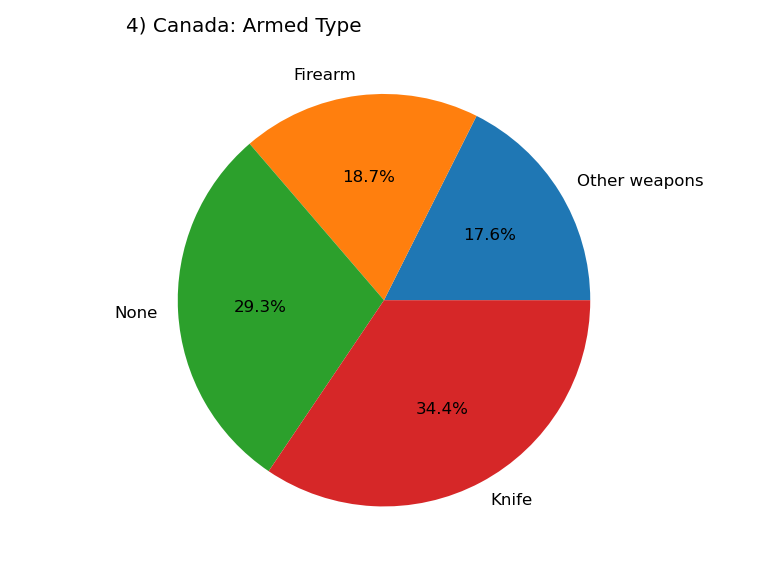

In [5]:


fig,ax=plt.subplots(1,1)
ax.set_title('4) Canada: Armed Type',loc='left')
ByRace=Data.CA_PoliceKillings.groupby('ARMED TYPE').count()['AGE'].sort_values()
ax.pie(ByRace.values,labels=ByRace.index,
    autopct='%1.1f%%')
plt.tight_layout()


## 5) Which police departments are responsible for the most killings?
    Here are all departments which have killed at least ten people in the last 20 years.
    The RCMP is the worst offender.
    
    By Province, the RCMP in BC is far and away the worst

<IPython.core.display.Javascript object>


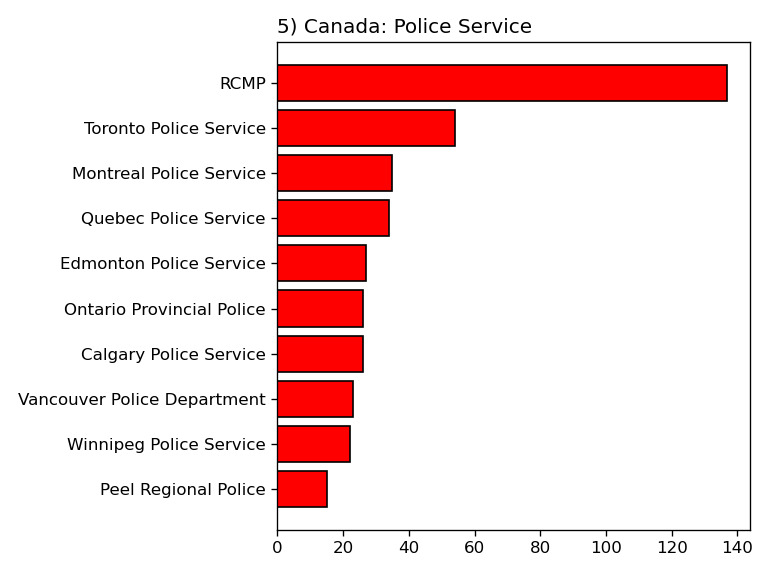

<IPython.core.display.Javascript object>


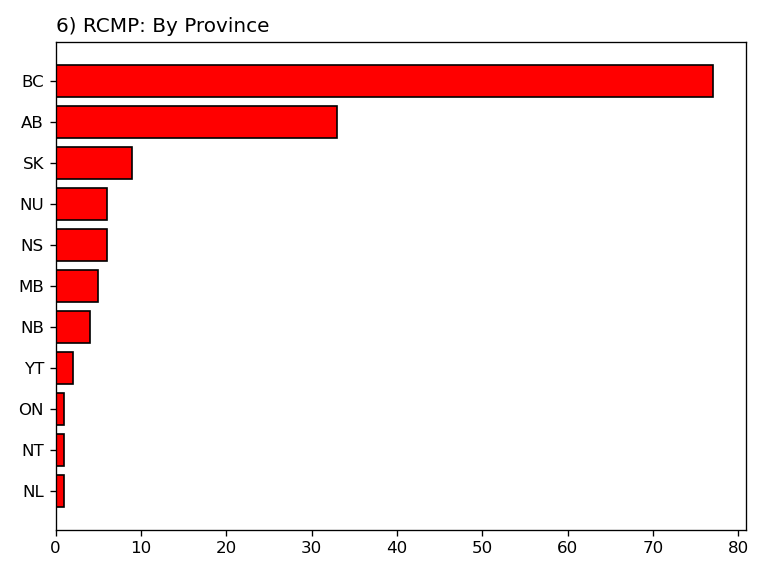

In [6]:

ARMED_TYPE=(Data.CA_PoliceKillings.groupby(['POLICE SERVICE','ARMED TYPE']).count()['AGE'].unstack())
Types = ARMED_TYPE.columns
ARMED_TYPE['Total']=ARMED_TYPE.sum(axis=1)

fig,ax=plt.subplots(1,1)
ax.set_title('5) Canada: Police Service',loc='left')
# ByRace=Data.CA_PoliceKillings.groupby('POLICE SERVICE').count()['AGE'].sort_values()[-10:]
ARMED_TYPE = ARMED_TYPE.loc[ARMED_TYPE['Total']>10].sort_values(by='Total')
ax.barh(ARMED_TYPE.index,ARMED_TYPE['Total'].values,color=[1,0,0],edgecolor='k')
plt.tight_layout()

fig,ax=plt.subplots(1,1)
RCMP = Data.CA_PoliceKillings.loc[Data.CA_PoliceKillings['POLICE SERVICE']=='RCMP'].groupby('PROV').count().sort_values(by='RACE')
ax.set_title('6) RCMP: By Province',loc='left')
# ARMED_TYPE = ARMED_TYPE.loc[ARMED_TYPE['Total']>10].sort_values(by='Total')
ax.barh(RCMP.index,RCMP['RACE'].values,color=[1,0,0],edgecolor='k')
plt.tight_layout()




# Data Normalization

## Normalization, is the process of scaling (AKA Normalizing) one number by another.

    For example, we can as the question:
### Which police departments are most likely to kill an unarrmed person?

    We can determine this by normalizing the number of unarmmed victims by the total number of victims for each department.  This will tell us what percentage of each departments victims were unarmed.

So our normalization calculation would look like:
    
\begin{align}
\ Percent Unarmed & = (\frac{Unarmed Victims}{Total Victims})* 100 \\
\end{align}

    Vancouver Police are the thrid most likely to kill an unarmed person.  Nearly 40% of their victims are unarmed!

<IPython.core.display.Javascript object>


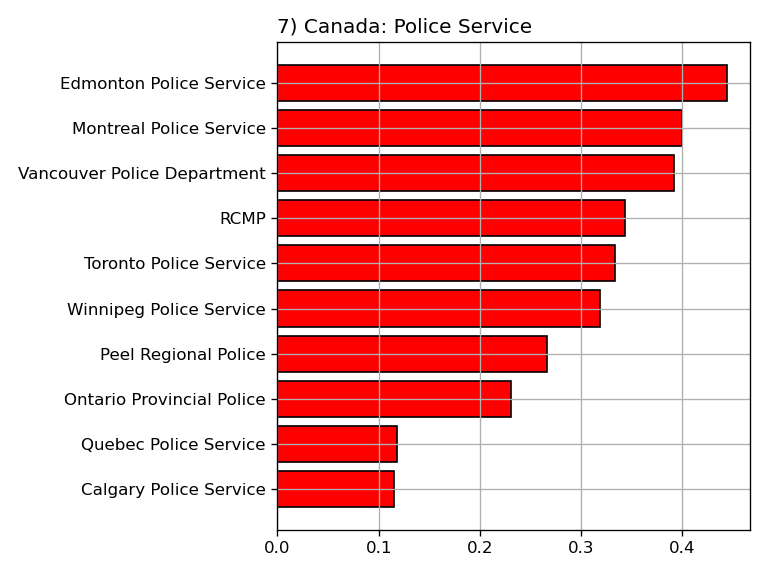

In [7]:

ARMED_TYPE['Unarmed%']=ARMED_TYPE['None']/ARMED_TYPE['Total']
ARMED_TYPE = ARMED_TYPE.fillna(0)
fig,ax=plt.subplots(1,1)
ax.set_title('7) Canada: Police Service',loc='left')
ARMED_TYPE = ARMED_TYPE.loc[ARMED_TYPE['Total']>10].sort_values(by='Unarmed%')
ax.barh(ARMED_TYPE.index,ARMED_TYPE['Unarmed%'].values,color=[1,0,0],edgecolor='k')
ax.grid()
plt.tight_layout()

# This information should be widely known and available.  The RCMP and other Police Services across Canada need to be held accountable.




# Now lets comapre Canada to the United States.  

## To do this, we'll need to rely on Data Normalization since the countries have vastly different populations

### But first, we'll look at a few key aspects of the data

<IPython.core.display.Javascript object>


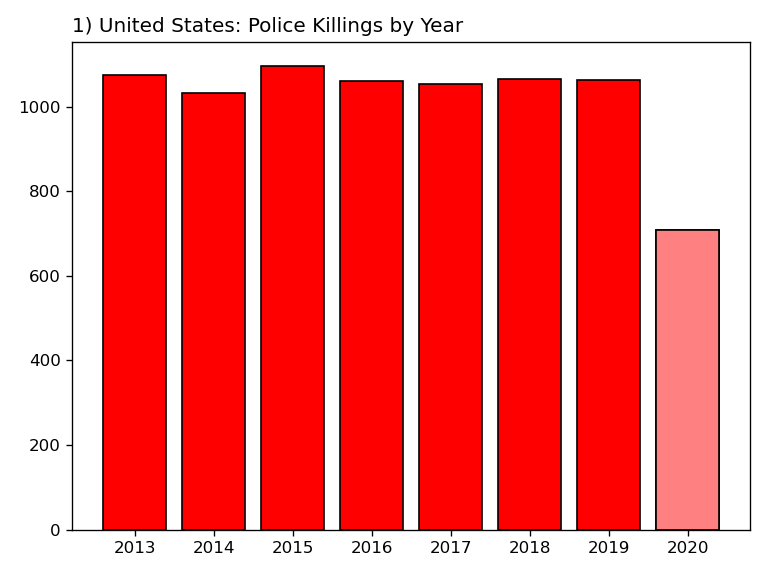

<IPython.core.display.Javascript object>


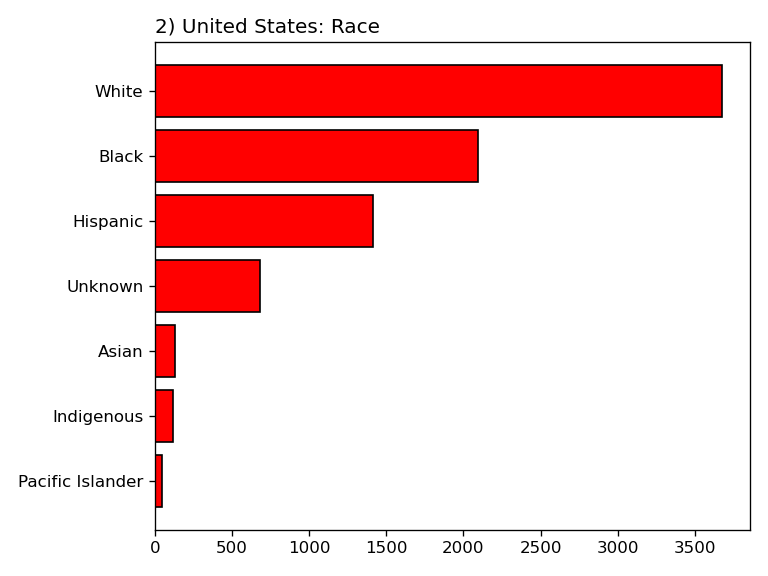

<IPython.core.display.Javascript object>


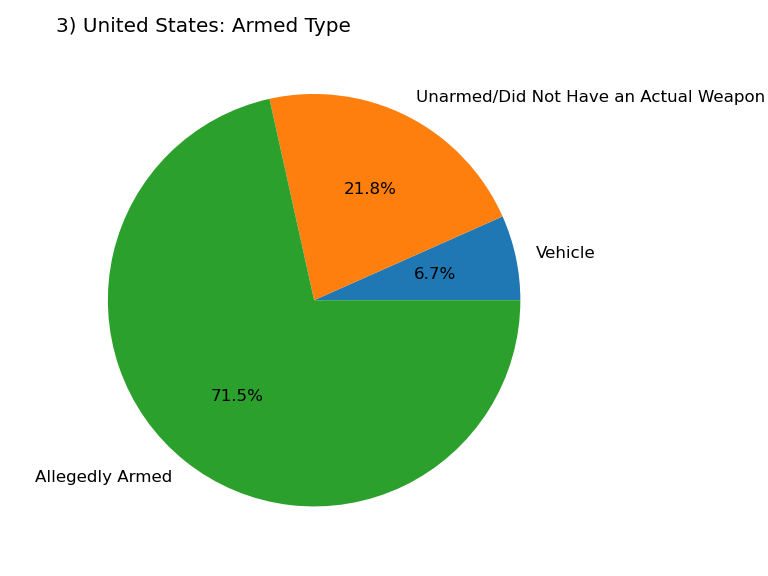

<IPython.core.display.Javascript object>


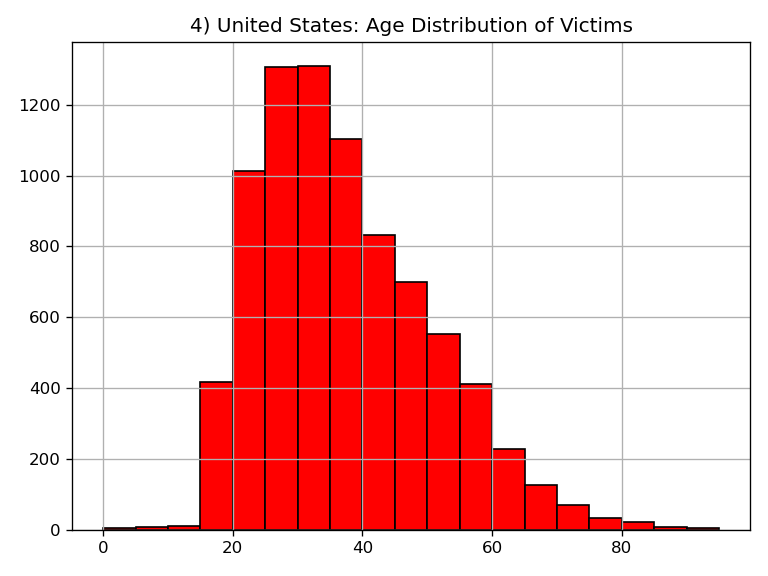

In [8]:
US_Total=Data.US_PoliceKillings["Victim's age"].count()

fig,ax=plt.subplots(1,1)
ax.set_title('1) United States: Police Killings by Year',loc='left')
ByYear=Data.US_PoliceKillings.resample('YS').count()['AGE']
ax.bar(ByYear.index.year,ByYear.values,color=[1,0,0],edgecolor='k')
ax.bar([2020],[ByYear.values[-1]],color=[1,.5,.5],edgecolor='k')
plt.tight_layout()

fig,ax=plt.subplots(1,1)
ax.set_title('2) United States: Race',loc='left')
ByRace=Data.US_PoliceKillings.groupby('RACE').count()['AGE'].sort_values()
ax.barh(ByRace.index,ByRace.values,color=[1,0,0],edgecolor='k')
plt.tight_layout()

fig,ax=plt.subplots(1,1)
ax.set_title('3) United States: Armed Type',loc='left')
ByRace=Data.US_PoliceKillings.groupby('Unarmed/Did Not Have an Actual Weapon').count()['AGE'].sort_values()
ax.pie(ByRace.values,labels=ByRace.index,
    autopct='%1.1f%%')
plt.tight_layout()

fig,ax=plt.subplots(1,1)
Data.US_PoliceKillings['AGE'].hist(bins = np.arange(0,100,5),color=[1,0,0],edgecolor='k',ax=ax)
ax.set_title('4) United States: Age Distribution of Victims')
plt.tight_layout()



# To compare police killings between Canada and the United States we need to Normalize our data.

* If we don't, our comparsion wont make any sense
    * The graph below is comparing two countries with very different populations and two datasets with different periods of record.

<IPython.core.display.Javascript object>


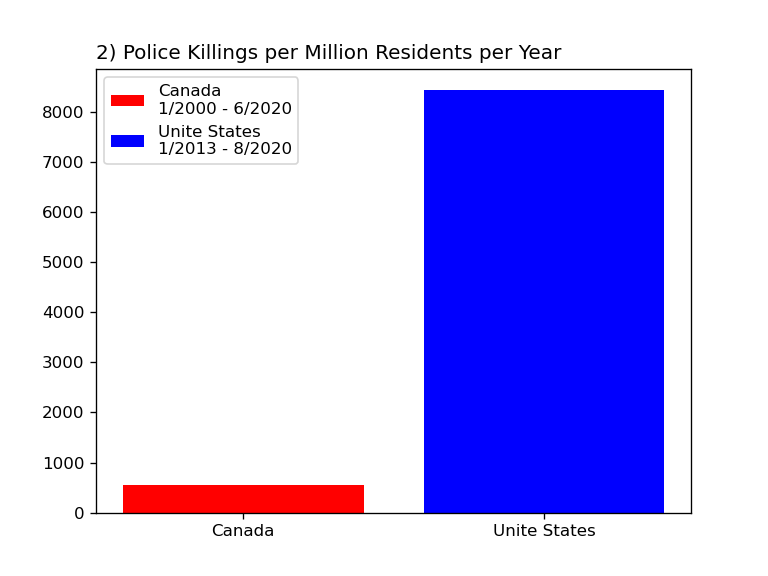

In [9]:
fig,ax=plt.subplots()
ax.bar([0],CA_Total,color=[1,0,0],label='Canada\n1/2000 - 6/2020')
ax.bar([1],US_Total,color=[0,0,1],label='Unite States\n1/2013 - 8/2020')
ax.set_xticks([0,1])
ax.set_xticklabels(['Canada','Unite States'])
ax.set_title('2) Police Killings per Million Residents per Year',loc='left')
ax.legend()

# Normalization lets us scale our data to make it more appropriate for comparisson

# We have a few things to acount for here when normalizing:

* ### A) Record Lenght
    The time periods of these datasets are different
        We could only look at the time period when they overlap overlap but, but this would require us to ignore some of the data.  We don't want to do that.
        Alternatively, we can calculate the average number of killings per year.  The data will not be drawn from the same periods, but they will be one the same time scale, and they will be as inclusive as possible
* ### B) Population
    The Canaa has about 35 million residents.  The US has about 327 million.  
        To make the datasets directly comparable, we need to normalize by the total population of each country.  This will alow us to calculate the police killing rate
* ### C) Scale
    Dividing by the population would give us the average number of police killings per person per year.
        This is a very small number and doesn't make too much sense.  Instead, we can divide by the total population (in millioins).  This will give us the police killing rate per million residents per year.




<IPython.core.display.Javascript object>


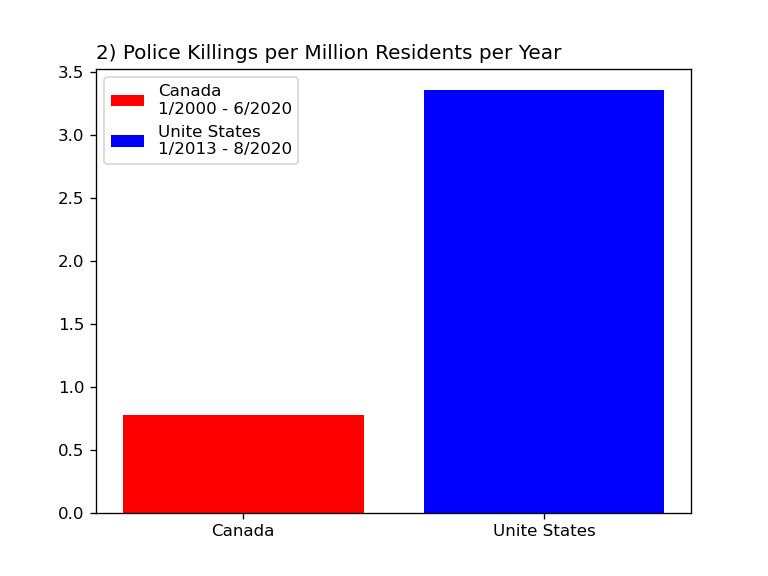

4.341376011367358


In [10]:
CA_Rate = CA_Total /(Data.CA.Total.sum()*Data.CA_Length) * 1e6
US_Rate = US_Total /(Data.US.Total.sum()*Data.US_Length) * 1e6

fig,ax=plt.subplots()
ax.bar([0],CA_Rate,color=[1,0,0],label='Canada\n1/2000 - 6/2020')
ax.bar([1],US_Rate,color=[0,0,1],label='Unite States\n1/2013 - 8/2020')
ax.set_xticks([0,1])
ax.set_xticklabels(['Canada','Unite States'])
ax.set_title('2) Police Killings per Million Residents per Year',loc='left')
ax.legend()

print(US_Rate/CA_Rate)

# By normalizing, we can more directly compare the patterns between geographic regions with different characteristics (Population) and datasets of different lenghts

###  We can see the police killing rate in the United States is over four times as high as Canada.  On average, the US is more dangerous and police are more likely to kill someone there
But this doesn't tell us the whole story.  There is are significant racial disparities in the police killings on both sides of the border and the demographics of each country are different
We'll compare the police killing rates of three deomgraphic groups: White, Black, and Indgenous to see how they compare on both sides of the border.
* The Canadian census and Untied States census used different racial groupings so it is difficult to compare across all demographics.
* The police violence datasets for each country also use slightly different demographic groupings than their respective censuses.
* White, black, and indigenous are in both police violence datasets and are available from both sets of census data.  Whites are the majority in both contries, while black and indgenous people disporportionately impacted by police killings on both sides of the border.
* One Caveat, the race of the victim is unknown for 24% of Canadian and 10% of United States.  This adds uncertainty to the comparison.  It also means that the Police Killing Rates by race are underestimated, especially for Canada
    * This is partly becasue these datasets were collected by third party organizations
        * The Canadian Data was collected by the CBC
        * The US Data was collected by the non-profit Mapping Police Violence
    * These datsets rely on media reports and are likely incomplete
    * Police departments and governments should be responsible for collecting and publishing this information to ensure better acountability, however police and governments around North America have failed to do so

Police Killing Rates:
                  US        CA
Total       3.353979  0.750329
White       2.046058  0.446725
Black       6.636197  1.956103
Indigenous  5.484477  2.597146


<IPython.core.display.Javascript object>


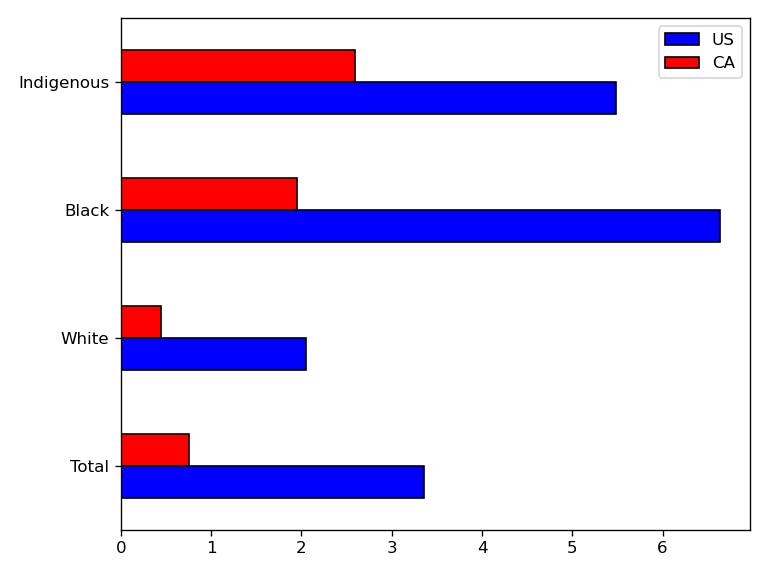

In [11]:
Data.ScaleData(scale=1e6)
print('Police Killing Rates:')
print(Data.Summary)

Data.Summary[['US','CA']].plot.barh(color=[[0,0,1],[1,0,0]],edgecolor='k')

plt.tight_layout()


# Scaled, to their respective populations, we can see that Indigenous and Black people are much more likely to be killed by the police than white pople in both Canada and the United States
* The overal rates for each race are higher in the US than Canada
    * However the dispartiy between races is actually greater in Canada than the United States
    
* To show this, we can divide the black and indigenous rates fore each country by the white rate.
    * This will tell us how many times more likely a black or indigenous individual is to be killed by the police than a white individual in each country.
    * We can see that Indigenous and Black Canadians are 5.8 and 4.4 times more likely to be killied by police than a White Canadian
        * These disparities are higher than in the US
            * By this metric, you could suggest that police in Canada may be more racially biased than police in the US

                  US        CA
Black       3.243406  4.378760
Indigenous  2.680509  5.813743


<IPython.core.display.Javascript object>


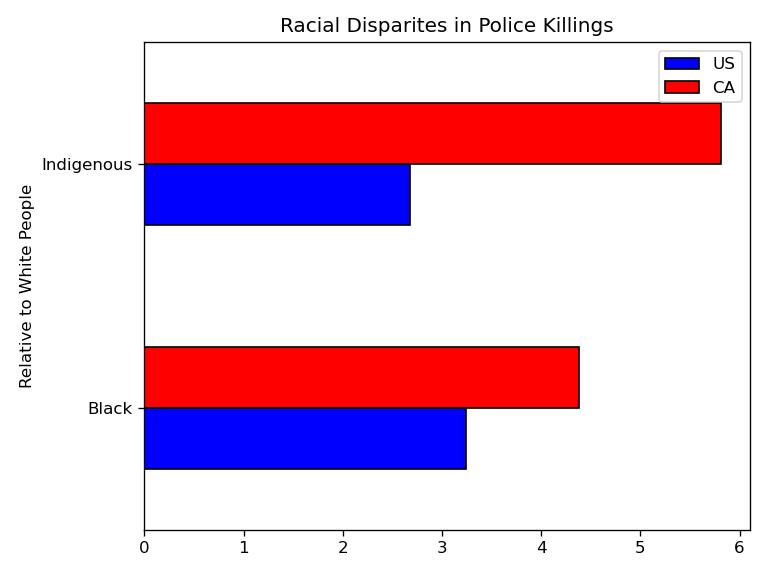

POLICE SERVICE
Medicine Hat Police Service, RCMP                    0.007353
Scarborough Police Service                           0.007353
Sarnia Police Services                               0.007353
Regina Police Service                                0.007353
Service de police de la Ville de Laval               0.007353
Thunder Bay Police Service                           0.007353
Niagara Regional Police Services                     0.007353
Service de police de Terrebonne                      0.007353
Lethbridge Police Services                           0.007353
Service de police de l'agglomération de Longueuil    0.007353
Kennebecasis Regional Police Force                   0.007353
Halton Regional Police Services, OPP                 0.007353
Halton Regional Police Service                       0.007353
Halifax Regional Police                              0.007353
Waterloo Regional Police Service                     0.007353
Delta Police Department                              0.

In [12]:
Ratio = Data.Summary.loc[Data.Summary.index=='Black']/Data.Summary.loc[Data.Summary.index=='White'].values
Ratio = Ratio.append(Data.Summary.loc[Data.Summary.index=='Indigenous']/Data.Summary.loc[Data.Summary.index=='White'].values)

print(Ratio)

Ratio.plot.barh(color=[[0,0,1],[1,0,0]],edgecolor='k')
plt.title('Racial Disparites in Police Killings')
plt.ylabel('Relative to White People')
plt.tight_layout()
# print(Data.CA.columns)
# Ratio
RCMP_Race = Data.CA_PoliceKillings.loc[Data.CA_PoliceKillings['RACE']=='Unknown'].groupby('POLICE SERVICE').count()['PROV'].sort_values()
print(RCMP_Race/RCMP_Race.sum())



# Systemic Racism in Policing is a Canadian Problem
* This issue isn't restricted to America, it's pervasive in Canada as well and can not be overlooked.  Colonialism didn't stop at the 49th paralell.

The RCMP were created by Prime Minister John A. Macdonald.  He got the idea for the Mounties from the Royal Irish Constabulary, a paramilitary police force the British created to keep the Irish under control.  Initially called the "North West Mounted Rifles", their primary purpose to clear Indigenous people off their land.  The name was changed to "North-West Mounted Police" because officials in the United States raised concerns that an armed force along the border was a prelude to a military buildup.  This organizatioin was renamed the Royal Canadian Monuted Police in 1904.

# Histograms and Classification Schemes

* Rates vary by administrative divisoins, eg. (State/Province)
    * If we want to compare between states/provinces the first step is to look at histograms.
    
* A Histogram shows us the frequency distributioin of a given variable
    * Data is grouped into a set of bins
        * We can either specify a set number of bins or a specific bin with
* We'll combine the Canadain and United States data and look at a histogram of the total police violence rate



<IPython.core.display.Javascript object>


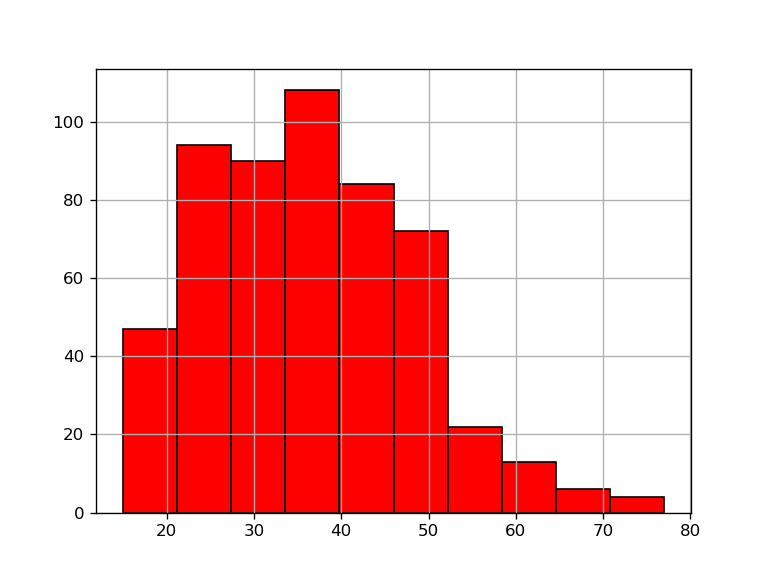

In [13]:
# plt.figure()
import numpy as np
gig,ax=plt.subplots()#1,2)
Data.CA_PoliceKillings['AGE'].hist(ax=ax,color=[1,0,0],edgecolor='k')
# print(Data.CA_PoliceKillings.groupby(['POLICE SERVICE','PROV']).count())
# Data.CA_PoliceKillings['AGE'].hist(ax=ax[0],color=[1,0,0],edgecolor='k')
# Data.US_PoliceKillings['AGE'].hist(ax=ax[1],color=[0,0,1],edgecolor='k')


# ax[1].set_yscale('symlog')
# print(ax[1].get_xticks())
# ax[1].set_xticks(np.arange(10,90,10))
# Temp = Data.US['Total_Rate']
# Temp = Temp.append(Data.CA['Total_Rate'])

# plt.figure()
# Temp.hist(color='grey',edgecolor='k',bins=15)
# plt.title('Police Killing Rates by US State / CA Province')


<IPython.core.display.Javascript object>


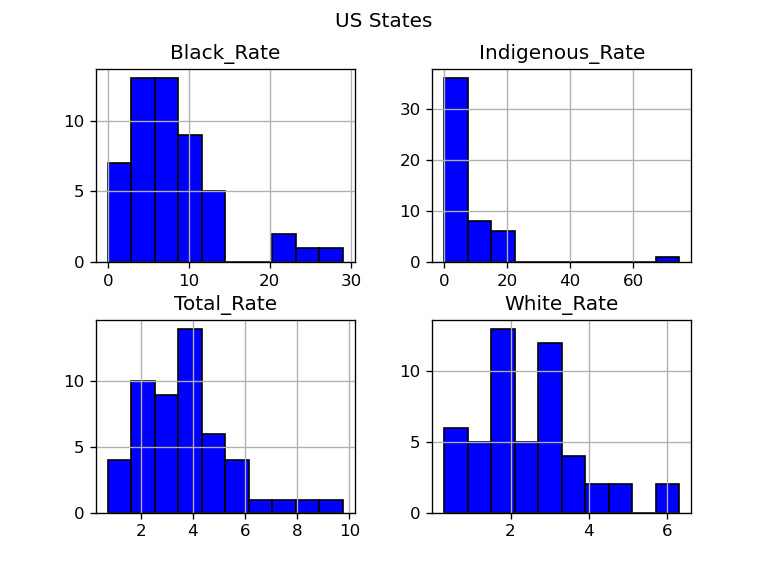

<IPython.core.display.Javascript object>


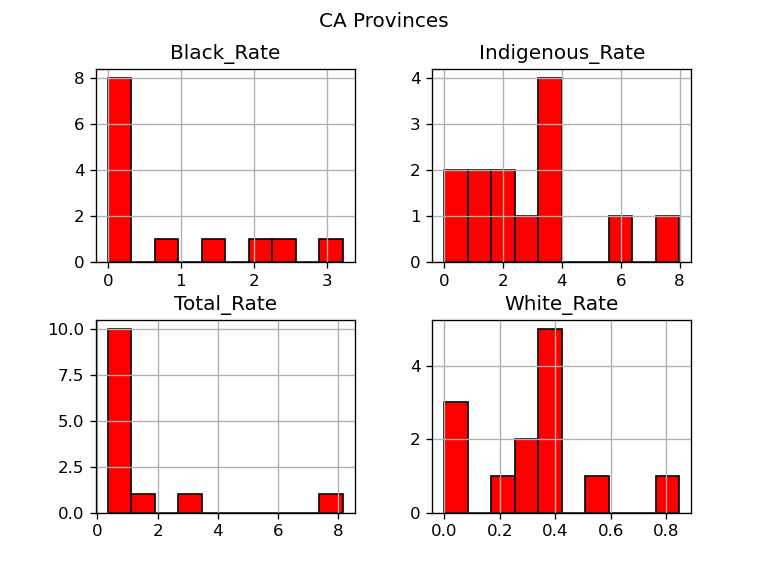

<IPython.core.display.Javascript object>


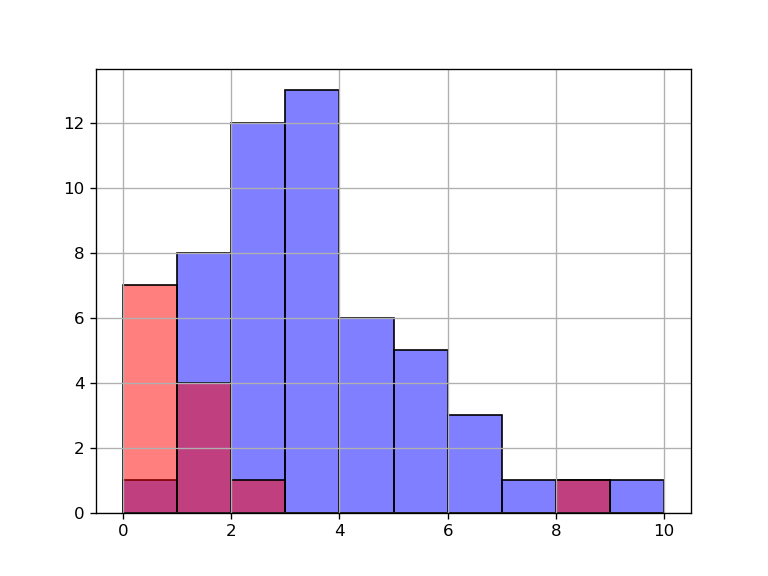

In [14]:

# Data.US['Total_Rate'].hist(ax=ax,color=[.05,.05,1,.5],edgecolor='k',linewidth=.5,bins=10)
# Data.CA['Total_Rate'].hist(ax=ax,color=[1,.0,.0,.5],edgecolor='k',linewidth=.5,bins=10)
# plt.figure()
Data.US[['Indigenous_Rate','Black_Rate','White_Rate','Total_Rate']].hist(color=[0,0,1],edgecolor='k',bins=10)
plt.suptitle('US States')


Data.CA[['Indigenous_Rate','Black_Rate','White_Rate','Total_Rate']].hist(color=[1,0,0],edgecolor='k',bins=10)
plt.suptitle('CA Provinces')



fig,ax=plt.subplots()

Data.US['Total_Rate'].hist(bins=np.arange(0,11,1),color=[0,0,1,.5],edgecolor='k')

Data.CA['Total_Rate'].hist(bins=np.arange(0,11,1),color=[1,0,0,.5],edgecolor='k')

# Natural Breaks

<IPython.core.display.Javascript object>


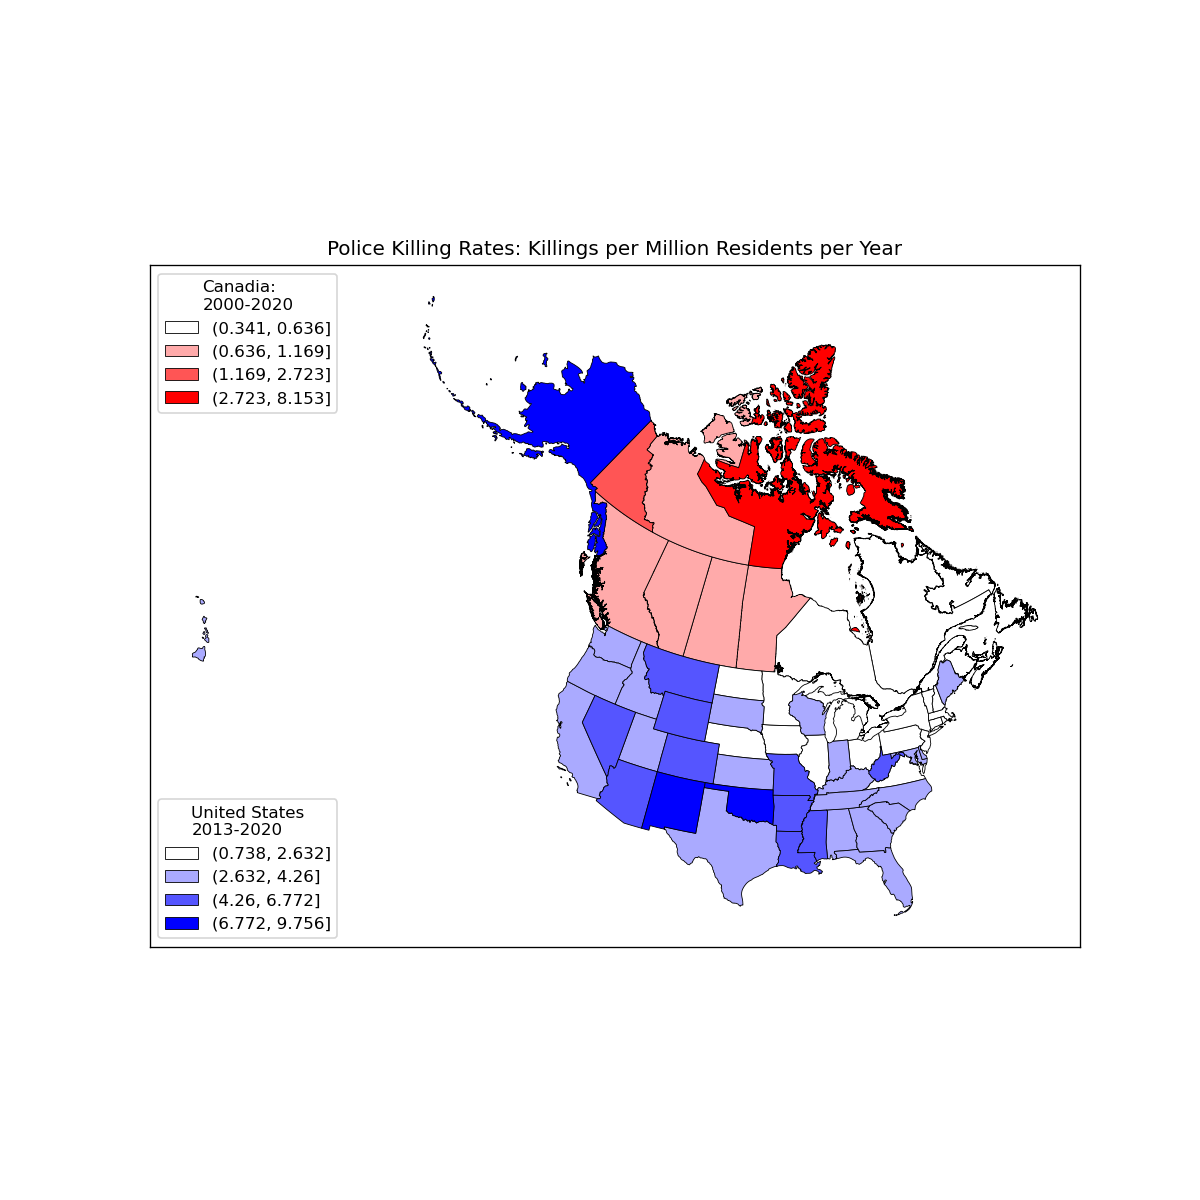

#ffffff
#ffaaaa
#ff5555
#ff0000


C:\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj

Text(0.5, 1.0, 'Police Killing Rates: Killings per Million Residents per Year')

In [15]:
import matplotlib
import matplotlib.patches as mpatches

Rate = 'Total'+'_'
n_classes=4
Data.Breaks(column=Rate+'Rate',classes=n_classes,Manual_Bins=[0,2.5,5,7.5,10])
labels=Data.CA[Rate+'Rate_NB'].unique().sort_values()
colors = []
for c in range(n_classes):
    colors.append(matplotlib.colors.to_hex([1,1-c/(n_classes-1),1-c/(n_classes-1)]))
CA_Color = {key:value for key,value in zip(labels,colors)}
# print(CA_Color)


fig,ax=plt.subplots(figsize=(10,10))
CA_Patches = []
for klass in Data.CA[Rate+'Rate_NB'].unique().sort_values():
    print(CA_Color[klass])
    kwargs = {'facecolor':CA_Color[klass],
             'edgecolor':'black',
             'linewidth':.5,
             'label':klass}
    Data.CA.loc[Data.CA[Rate+'Rate_NB']==klass].plot(
        ax=ax,
        **kwargs
             )
    CA_Patches.append(mpatches.Patch(**kwargs))

    
labels=Data.US[Rate+'Rate_NB'].unique().sort_values()
colors = []
for c in range(n_classes):
    colors.append(matplotlib.colors.to_hex([1-c/(n_classes-1),1-c/(n_classes-1),1]))
US_Color = {key:value for key,value in zip(labels,colors)}

US_Patches = [] 
for klass in Data.US[Rate+'Rate_NB'].unique().sort_values():
    kwargs = {'facecolor':US_Color[klass],
             'edgecolor':'black',
             'linewidth':.5,
             'label':klass}
    Data.US.to_crs(Data.CA.crs).loc[Data.US[Rate+'Rate_NB']==klass].plot(
        ax=ax,
        **kwargs
             )
    US_Patches.append(mpatches.Patch(**kwargs))
    
first_legend = plt.legend(handles=CA_Patches, loc='upper left',
      title='Canadia:\n2000-2020')

# Add the legend manually to the current Axes.
plt.gca().add_artist(first_legend)

# Create another legend for the second line.
ax.legend(handles=US_Patches, loc='lower left',
      title='United States\n2013-2020')

plt.show()
    
    
# ax.legend(handles={'PKR':Patches},) 
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Police Killing Rates: Killings per Million Residents per Year')


# Quantiles

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


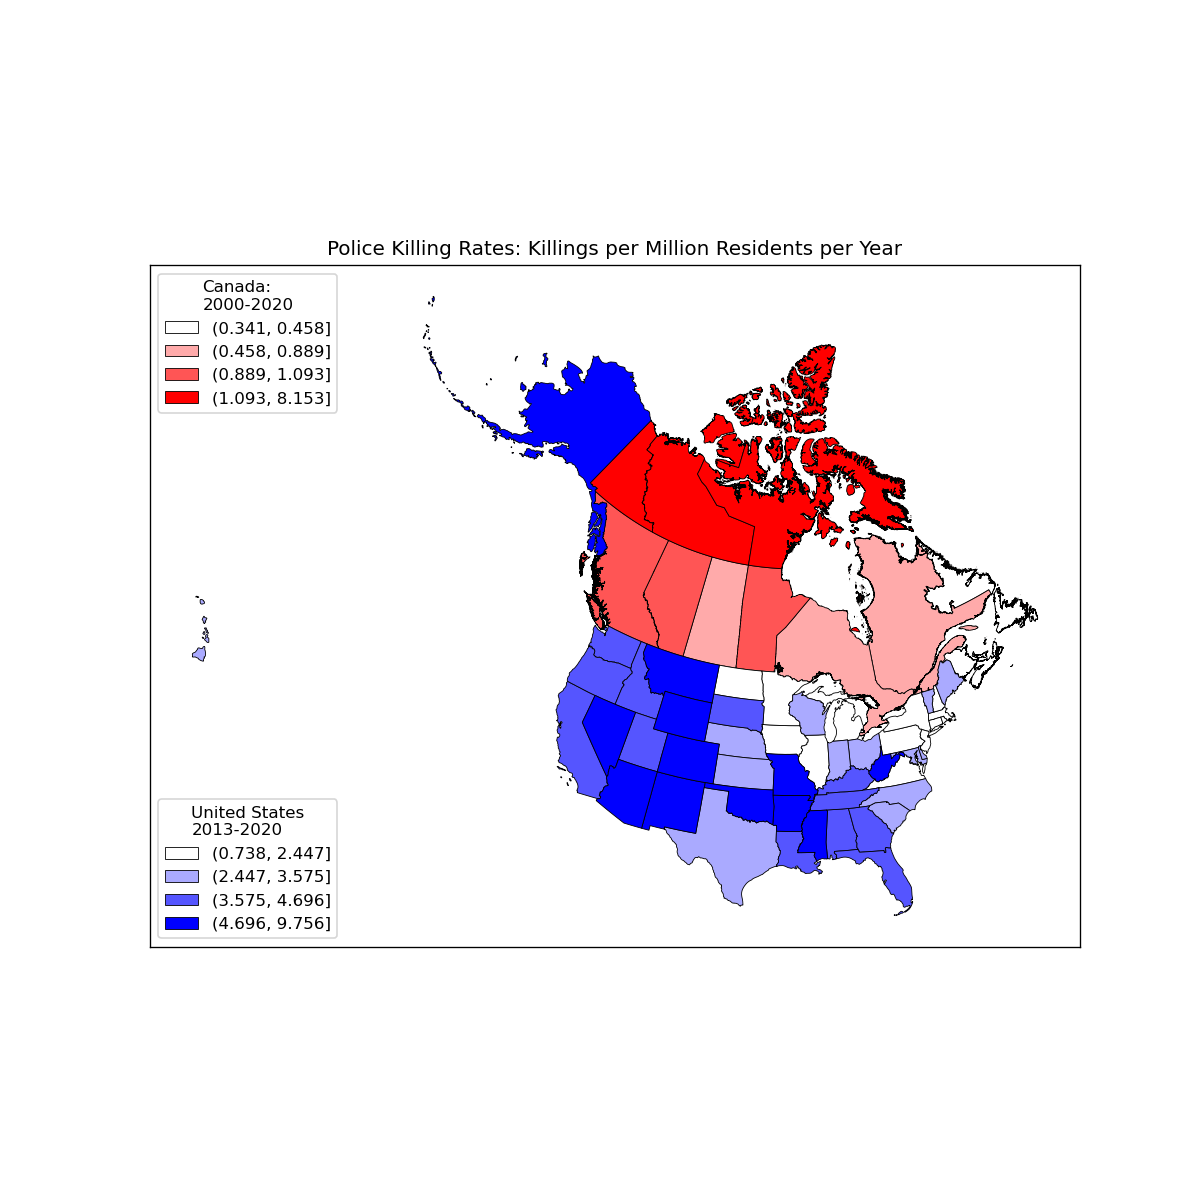

#ffffff
#ffaaaa
#ff5555
#ff0000


C:\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj

Text(0.5, 1.0, 'Police Killing Rates: Killings per Million Residents per Year')

In [16]:

labels=Data.CA[Rate+'Rate_QB'].unique().sort_values()
colors = []
for c in range(n_classes):
    colors.append(matplotlib.colors.to_hex([1,1-c/(n_classes-1),1-c/(n_classes-1)]))
CA_Color = {key:value for key,value in zip(labels,colors)}
# print(CA_Color)


fig,ax=plt.subplots(figsize=(10,10))
CA_Patches = []
for klass in Data.CA[Rate+'Rate_QB'].unique().sort_values():
    print(CA_Color[klass])
    kwargs = {'facecolor':CA_Color[klass],
             'edgecolor':'black',
             'linewidth':.5,
             'label':klass}
    Data.CA.loc[Data.CA[Rate+'Rate_QB']==klass].plot(
        ax=ax,
        **kwargs
             )
    CA_Patches.append(mpatches.Patch(**kwargs))

    
labels=Data.US[Rate+'Rate_QB'].unique().sort_values()
colors = []
for c in range(n_classes):
    colors.append(matplotlib.colors.to_hex([1-c/(n_classes-1),1-c/(n_classes-1),1]))
US_Color = {key:value for key,value in zip(labels,colors)}

US_Patches = [] 
for klass in Data.US[Rate+'Rate_QB'].unique().sort_values():
    kwargs = {'facecolor':US_Color[klass],
             'edgecolor':'black',
             'linewidth':.5,
             'label':klass}
    Data.US.to_crs(Data.CA.crs).loc[Data.US[Rate+'Rate_QB']==klass].plot(
        ax=ax,
        **kwargs
             )
    US_Patches.append(mpatches.Patch(**kwargs))
    
first_legend = plt.legend(handles=CA_Patches, loc='upper left',
      title='Canada:\n2000-2020')

# Add the legend manually to the current Axes.
plt.gca().add_artist(first_legend)

# Create another legend for the second line.
ax.legend(handles=US_Patches, loc='lower left',
      title='United States\n2013-2020')

plt.show()
    
    
# ax.legend(handles={'PKR':Patches},) 
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Police Killing Rates: Killings per Million Residents per Year')


# Equal Interval

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


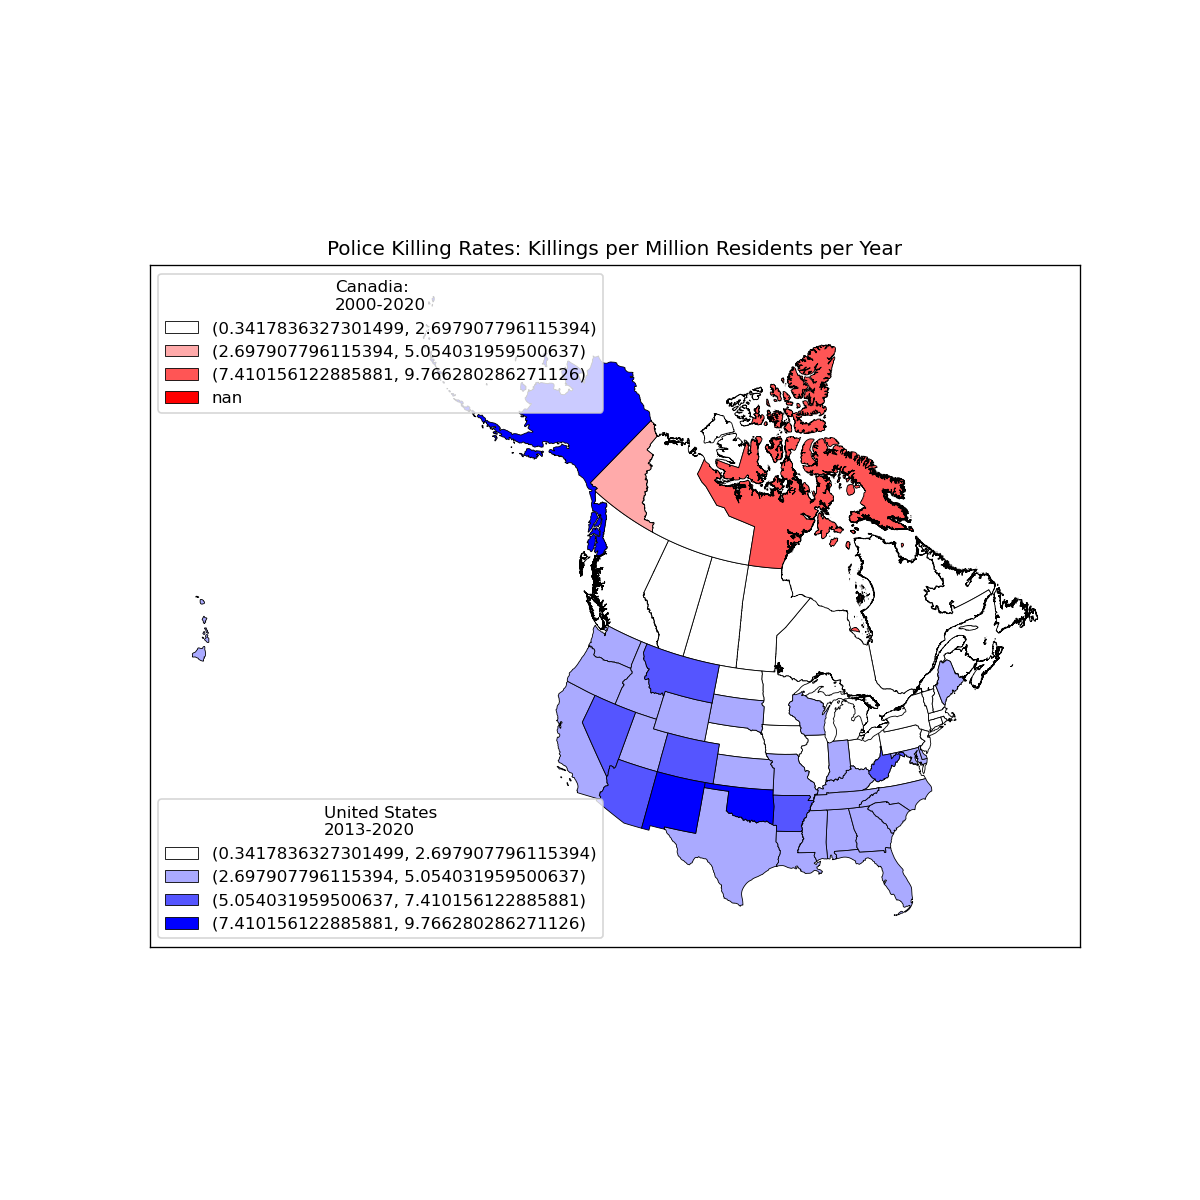

#ffffff
#ffaaaa
#ff5555
#ff0000


C:\Anaconda3\lib\site-packages\geopandas\plotting.py:487: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
C:\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' synta

Text(0.5, 1.0, 'Police Killing Rates: Killings per Million Residents per Year')

In [17]:

labels=Data.CA[Rate+'Rate_EB'].unique().sort_values()
colors = []
for c in range(n_classes):
    colors.append(matplotlib.colors.to_hex([1,1-c/(n_classes-1),1-c/(n_classes-1)]))
CA_Color = {key:value for key,value in zip(labels,colors)}
# print(CA_Color)


fig,ax=plt.subplots(figsize=(10,10))
CA_Patches = []
for klass in Data.CA[Rate+'Rate_EB'].unique().sort_values():
    print(CA_Color[klass])
    kwargs = {'facecolor':CA_Color[klass],
             'edgecolor':'black',
             'linewidth':.5,
             'label':klass}
    Data.CA.loc[Data.CA[Rate+'Rate_EB']==klass].plot(
        ax=ax,
        **kwargs
             )
    CA_Patches.append(mpatches.Patch(**kwargs))

    
labels=Data.US[Rate+'Rate_EB'].unique().sort_values()
colors = []
for c in range(n_classes):
    colors.append(matplotlib.colors.to_hex([1-c/(n_classes-1),1-c/(n_classes-1),1]))
US_Color = {key:value for key,value in zip(labels,colors)}

US_Patches = [] 
for klass in Data.US[Rate+'Rate_EB'].unique().sort_values():
    kwargs = {'facecolor':US_Color[klass],
             'edgecolor':'black',
             'linewidth':.5,
             'label':klass}
    Data.US.to_crs(Data.CA.crs).loc[Data.US[Rate+'Rate_EB']==klass].plot(
        ax=ax,
        **kwargs
             )
    US_Patches.append(mpatches.Patch(**kwargs))
    
first_legend = plt.legend(handles=CA_Patches, loc='upper left',
      title='Canada:\n2000-2020')

# Add the legend manually to the current Axes.
plt.gca().add_artist(first_legend)

# Create another legend for the second line.
ax.legend(handles=US_Patches, loc='lower left',
      title='United States\n2013-2020')

plt.show()
    
    
# ax.legend(handles={'PKR':Patches},) 
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Police Killing Rates: Killings per Million Residents per Year')


# Manual Breaks

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


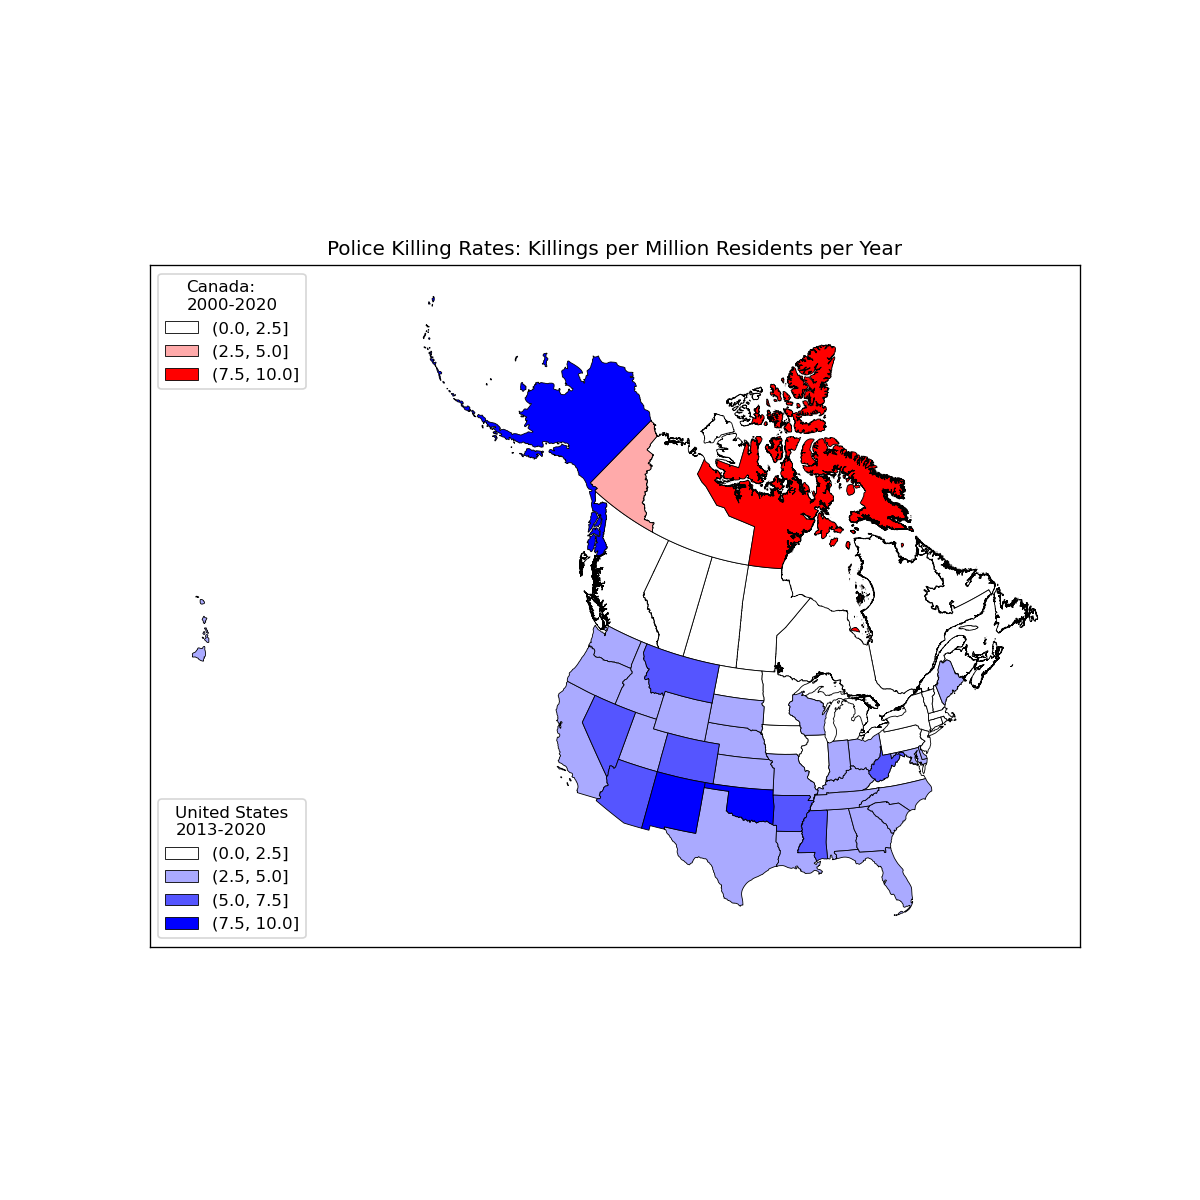

#ffffff
#ffaaaa
#ff0000


C:\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj

Text(0.5, 1.0, 'Police Killing Rates: Killings per Million Residents per Year')

In [18]:

labels=Data.US[Rate+'Rate_MB'].unique().sort_values()
colors = []
for c in range(n_classes):
    colors.append(matplotlib.colors.to_hex([1,1-c/(n_classes-1),1-c/(n_classes-1)]))
CA_Color = {key:value for key,value in zip(labels,colors)}
# print(CA_Color)


fig,ax=plt.subplots(figsize=(10,10))
CA_Patches = []
for klass in Data.CA[Rate+'Rate_MB'].unique().sort_values():
    kwargs = {'facecolor':CA_Color[klass],
             'edgecolor':'black',
             'linewidth':.5,
             'label':klass}
    Data.CA.loc[Data.CA[Rate+'Rate_MB']==klass].plot(
        ax=ax,
        **kwargs
             )
    CA_Patches.append(mpatches.Patch(**kwargs))

    
labels=Data.US[Rate+'Rate_MB'].unique().sort_values()
colors = []
for c in range(n_classes):
    colors.append(matplotlib.colors.to_hex([1-c/(n_classes-1),1-c/(n_classes-1),1]))
US_Color = {key:value for key,value in zip(labels,colors)}

US_Patches = [] 
for klass in Data.US[Rate+'Rate_MB'].unique().sort_values():
    kwargs = {'facecolor':US_Color[klass],
             'edgecolor':'black',
             'linewidth':.5,
             'label':klass}
    Data.US.to_crs(Data.CA.crs).loc[Data.US[Rate+'Rate_MB']==klass].plot(
        ax=ax,
        **kwargs
             )
    US_Patches.append(mpatches.Patch(**kwargs))
    
first_legend = plt.legend(handles=CA_Patches, loc='upper left',
      title='Canada:\n2000-2020')

# Add the legend manually to the current Axes.
plt.gca().add_artist(first_legend)

# Create another legend for the second line.
ax.legend(handles=US_Patches, loc='lower left',
      title='United States\n2013-2020')

plt.show()
    
    
# ax.legend(handles={'PKR':Patches},) 
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Police Killing Rates: Killings per Million Residents per Year')


In [ ]:
from geopy.geocoders import MapBox
import folium
geolocator = MapBox(api_key="pk.eyJ1IjoianVuZXNwYWNlYm9vdHMiLCJhIjoiY2ticGpkbXUxMHZyeTJzbDNpMGpjNWM5biJ9.B3AUQA9Qff8fo7gAo6NTvw")

CanadaMap = folium.Map(
    location=[60,-95.5],
    zoom_start=3,
)

RACE_Types = Data.CA_PoliceKillings['RACE'].unique()
RACE = (Data.CA_PoliceKillings.groupby(['RACE','PROV','POLICE SERVICE']).count()['AGE']).reset_index()


for index,row in Data.CA_PoliceKillings.groupby(['POLICE SERVICE','PROV']).count().sort_values(by='AGE').iterrows():
    try:
        Dept = geolocator.geocode(index[0]+', '+index[1]+', Canada')
        popuptext = '''<body> <h2>'''+index[0]+', '+Data.can_province_names[index[1]]+'''</h2> 
                        <table style="width:100%">
                        <tr>
                        <th>Race</th>
                        <th>Number of Killings &nbsp </th>
                        <th>Percentage of Total</th>
                        </tr>
                        '''
        for i,rval in RACE.loc[((RACE['POLICE SERVICE']==index[0])&(RACE['PROV']==index[1])),['RACE','AGE']].sort_values(by='AGE').iterrows():

            popuptext+= '''<tr>
                        <td>'''+rval['RACE']+''' &nbsp </td>
                        <td>'''+str(rval['AGE'])+'''</td>
                        <td>'''+str(int(rval['AGE']/row['AGE']*100))+'''%</td>
                        </tr>'''

        popuptext+='''<tr>
                  <th>Total </th>
                  <th>'''+str(row['AGE'])+'''</th>
                  <th> </th>
                  </tr>'''
        text = folium.Html(popuptext, script=True)
        popup = folium.Popup(text, max_width=400,min_width=300)

        folium.CircleMarker(
                location=[Dept.latitude,Dept.longitude],
                radius=int(row['AGE']/2+1),
                popup=popup,
                fill_opacity = .5,
                fill=True,
                color='black',
                line_weight=.35,
                fill_color='red'
            ).add_to(CanadaMap)
    except:
        print('Could not GEOCODE:' ,index,row)
        pass
CanadaMap

In [ ]:
CanadaMap.save('CanadianPoliceViolenceIncidents.html')

# Which Police Department is most likely to kill an unarmed person?

In [ ]:
from geopy.geocoders import MapBox
import folium
geolocator = MapBox(api_key="pk.eyJ1IjoianVuZXNwYWNlYm9vdHMiLCJhIjoiY2ticGpkbXUxMHZyeTJzbDNpMGpjNWM5biJ9.B3AUQA9Qff8fo7gAo6NTvw")

CanadaMap = folium.Map(
    location=[60,-95.5],
    zoom_start=3,
)

# ARMED_TYPE_Types = Data.CA_PoliceKillings['ARMED TYPE'].unique()
# ARMED_TYPE = (Data.CA_PoliceKillings.groupby(['ARMED TYPE','PROV','POLICE SERVICE']).count()['AGE']).reset_index()

# ARMED_TYPE['Percent Unamred']=ARMED_TYPE[]

ARMED_TYPE=(Data.CA_PoliceKillings.groupby(['PROV','POLICE SERVICE','ARMED TYPE']).count()['AGE'].unstack())
Types = ARMED_TYPE.columns
ARMED_TYPE['Total']=ARMED_TYPE.sum(axis=1)
ARMED_TYPE['Unarmed%']=ARMED_TYPE['None']/ARMED_TYPE['Total']
ARMED_TYPE = ARMED_TYPE.fillna(0)
# print(Types,ARMED_TYPE['Unarmed%'].sort_values(ascending=False))
# print(ARMED_TYPE.loc[ARMED_TYPE['ARMED TYPE']=='None'].sort_values(by='AGE'))
# print(ARMED_TYPE.index.get_level_values(0))
for index,row in ARMED_TYPE.iterrows():
#     print(index,row)
# Data.CA_PoliceKillings.groupby(['POLICE SERVICE','PROV']).count().sort_values(by='AGE').iterrows():
    try:
        Dept = geolocator.geocode(index[1]+', '+index[0]+', Canada')
        popuptext = '''<body> <h2>'''+index[1]+', '+Data.can_province_names[index[0]]+'''</h2> 
                        <table style="width:100%">
                        <tr>
                        <th>Weapon</th>
                        <th>Number of Killings &nbsp </th>
                        <th>Percentage of Total</th>
                        </tr>
                        '''
#         print(row['None'])
        for typ in Types:
            
#         for i,rval in zip(row.index,row):
#             print(i,rval)
#         ARMED_TYPE.loc[((ARMED_TYPE['POLICE SERVICE']==index[0])&(ARMED_TYPE['PROV']==index[1])),['ARMED TYPE','AGE']].sort_values(by='AGE').iterrows():

            popuptext+= '''<tr>
                        <td>'''+typ+''' &nbsp </td>
                        <td>'''+str(row[typ])+'''</td>
                        <td>'''+str(int(row[typ]/row['Total']*100))+'''%</td>
                        </tr>'''

        popuptext+='''<tr>
                  <th>Total </th>
                  <th>'''+str(row['Total'])+'''</th>
                  <th> </th>
                  </tr>'''
        text = folium.Html(popuptext, script=True)
        popup = folium.Popup(text, max_width=400,min_width=300)

        folium.CircleMarker(
                location=[Dept.latitude,Dept.longitude],
                radius=int(row['None']+1),
                popup=popup,
                fill_opacity = .5,
                fill=True,
                color='black',
                line_weight=.35,
                fill_color='red'
            ).add_to(CanadaMap)
    except:
        print('Could not GEOCODE:' ,index,row)
        pass
CanadaMap